In [ ]:

import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:

trainingSet = datasets.MNIST('', train=True, download=True, transform=ToTensor())
testingSet = datasets.MNIST('', train=False, download=True, transform=ToTensor())
train = torch.utils.data.DataLoader(trainingSet, batch_size=50, shuffle=True)
test = torch.utils.data.DataLoader(testingSet, batch_size=50, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:

class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val

class Model3(nn.Module): 
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 30)
        self.fc3 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.fc3(val)
        return val


class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 24)
        self.fc2 = nn.Linear(24, 16)
        self.fc3 = nn.Linear(16, 10)
        self.fc4 = nn.Linear(10, 8)        
        self.fc5 = nn.Linear(8, 4)
        self.fc6 = nn.Linear(4, 10)        
        
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val


In [ ]:

model1 = Model1()
model2 = Model2()
model3 = Model3()
costFunc = nn.CrossEntropyLoss()
model1_Opt = optim.Adam(model1.parameters(), lr=0.001)
model2_Opt = optim.Adam(model2.parameters(), lr=0.001)
model3_Opt = optim.Adam(model3.parameters(),lr=0.001)

In [ ]:
def calcParams(inputModel):
    val = sum(params.numel() for params in inputModel.parameters() if params.requires_grad)
    return val
print(calcParams(model1))
print(calcParams(model2))
print(calcParams(model3))

203530
19584
16640


In [ ]:
EPOCHS = 50
model1_cost = []
model1_train_accuracy = []
model1_test_accuracy = []
for index in range(EPOCHS):
    print(index)
    for batch in train:
        inputImages, groundTruth = batch
        model1.zero_grad()
        output = model1(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model1_Opt.step()
    model1_cost.append(cost.detach().numpy())
    
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            output = model1(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    model1_train_accuracy.append(round(correct/total, 3))

    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            output = model1(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    model1_test_accuracy.append(round(correct/total, 3))


    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
# Train Deep neural networks, Calculate accuracy for training and testing in each epoch
model2_cost = []
model2_train_accuracy = []
model2_test_accuracy = []
for index in range(EPOCHS):
    print(index)
    # Train model and keep track of loss
    for batch in train:
        inputImages, groundTruth = batch
        model2.zero_grad()
        output = model2(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model2_Opt.step()
    model2_cost.append(cost.detach().numpy())
    
    # Calculate accuracy of deep nn on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            output = model2(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    model2_train_accuracy.append(round(correct/total, 3))

    # Calculate accuracy of deep nn on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            output = model2(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    model2_test_accuracy.append(round(correct/total, 3)) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
# Train Deep neural networks, Calculate accuracy for training and testing in each epoch
model3_cost = []
model3_train_accuracy = []
model3_test_accuracy = []
for index in range(EPOCHS):
    print(index)
    # Train model and keep track of loss
    for batch in train:
        inputImages, groundTruth = batch
        model3.zero_grad()
        output = model3(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        model3_Opt.step()
    model3_cost.append(cost.detach().numpy())
    
    # Calculate accuracy of deep nn on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            output = model3(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    model3_train_accuracy.append(round(correct/total, 3))

    # Calculate accuracy of deep nn on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            output = model3(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    model3_test_accuracy.append(round(correct/total, 3)) 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


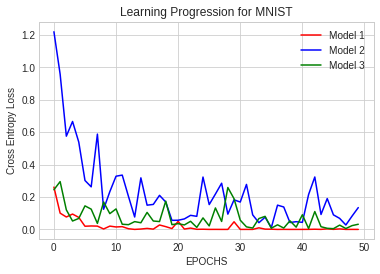

In [ ]:
# Visulaize Training process of nn for MNIST dataset
plt.plot(range(EPOCHS), model1_cost, 'r', label='Model 1')

plt.plot(range(EPOCHS), model2_cost, 'b', label='Model 2')
plt.plot(range(EPOCHS),model3_cost,'g',label = 'Model 3')
plt.title("Learning Progression for MNIST")
plt.xlabel("EPOCHS")
plt.ylabel("Cross Entropy Loss")
plt.legend(loc="upper right")
plt.show()

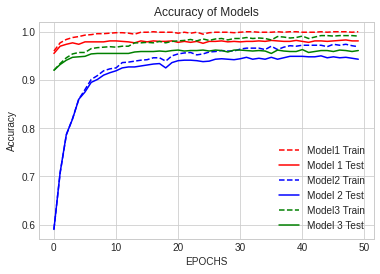

In [ ]:
# Visulaize Accuracy of nn for for MNIST dataset
plt.plot(range(EPOCHS), model1_train_accuracy, 'r--', label='Model1 Train')
plt.plot(range(EPOCHS), model1_test_accuracy, 'r', label='Model 1 Test')
plt.plot(range(EPOCHS), model2_train_accuracy, 'b--', label='Model2 Train')
plt.plot(range(EPOCHS), model2_test_accuracy, 'b', label='Model 2 Test')
plt.plot(range(EPOCHS), model3_train_accuracy, 'g--', label='Model3 Train')
plt.plot(range(EPOCHS), model3_test_accuracy, 'g', label='Model 3 Test')
plt.title("Accuracy of Models")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()